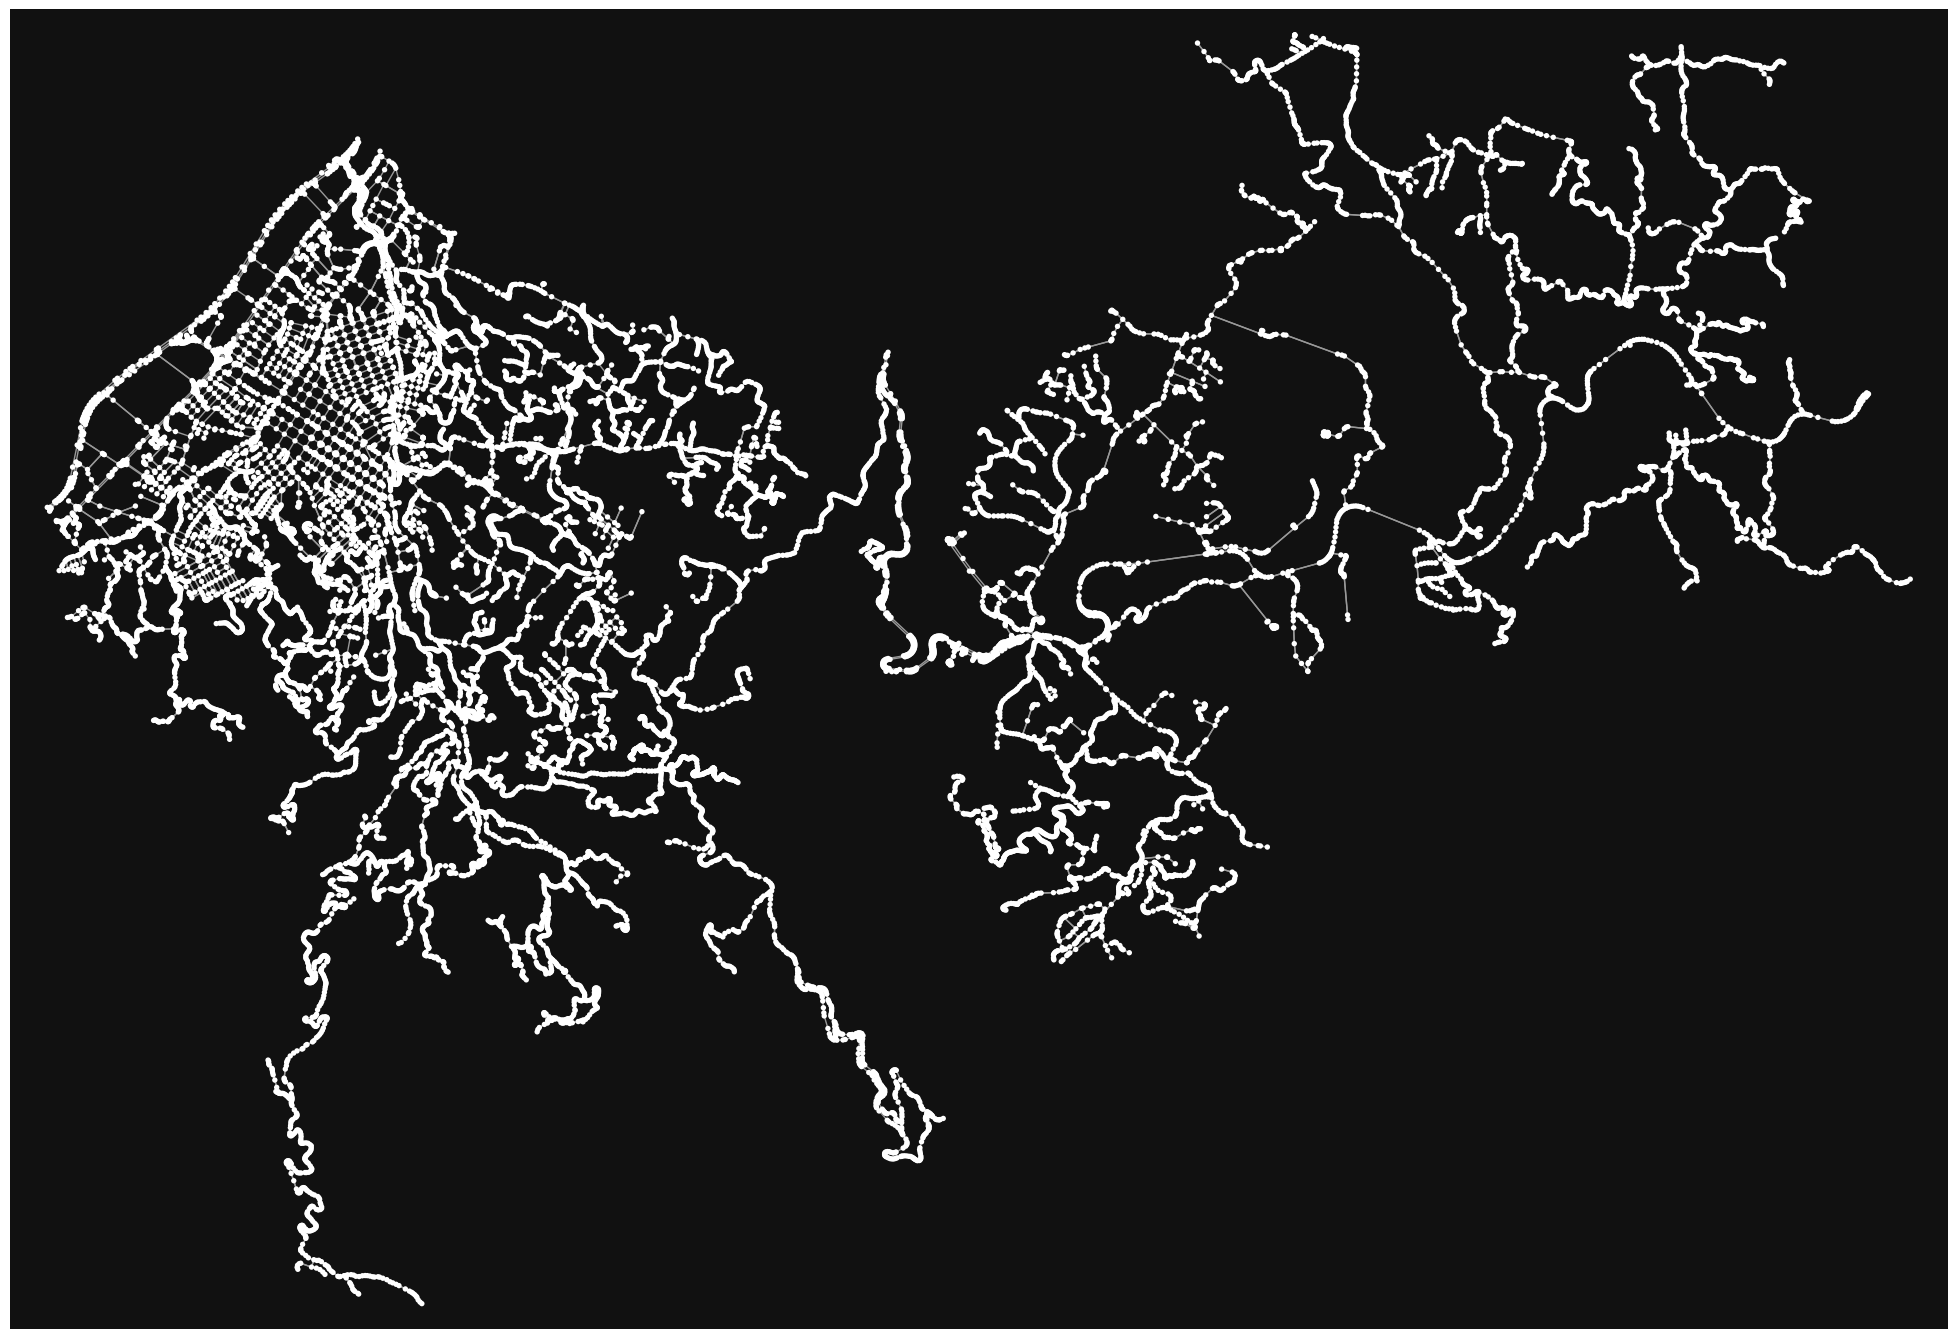

An error occurred: 'Map' object has no attribute 'get_operators'


In [2]:
from utils.map2 import Map
from typing import List, Optional
from utils.node import Node
from utils.tree import Tree


class MapNode(Node):
    def __init__(self, state, value, operators, operator=None, parent=None, objective=None):
        super().__init__(state, value, operators, operator, parent, objective)
        self.map = None

    def getState(self, index: int) -> Optional[List[float]]:
        # Implement this method based on your Map class
        # This should return the new state after applying the operator at the given index
        new_state = self.map.apply_operator(self.state, self.operators[index])
        return new_state if new_state != self.state else None

    def cost(self) -> int:
        return self.level
    


def calculate_route(map_obj: Map, start: str, end: str, algorithm: str):
    start_node, end_node = map_obj.set_route(start, end)
    
    # Define operators based on your map's possible actions
    operators = map_obj.get_operators()

    # Create initial MapNode
    initial_state = start_node  # Adjust this based on your Map implementation
    root_node = MapNode(state=initial_state, value="start", operators=operators)
    root_node.map = map_obj
    
    # Create Tree
    tree = Tree(root_node, operators)
    
    if algorithm == "breadth_first":
        objective = tree.breadthFirst(end_node)
    elif algorithm == "a_star":
        objective = tree.Aasterisk(end_node)
    else:
        raise ValueError("Invalid algorithm selected")

    if objective is None:
        raise ValueError("No route found")

    path = tree.printPath(objective)
    
    # Convert path to route for display_interactive_route
    route = [node.state for node in path]

    return route, tree

def main():
    # Initialize the map
    map_obj = Map(location="Envigado, Antioquia, Colombia", simplify=False)
    map_obj.set_data()

    # Set start and end locations
    start_location = "Sede Posgrados EIA"
    end_location = "Universidad EIA, Envigado, Colombia"

    # Calculate route using breadth-first search
    try:
        route, tree = calculate_route(map_obj, start_location, end_location, "breadth_first")
        
        # Display the route on the map
        fig = map_obj.display_interactive_route(route, route[0], route[-1])

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()